In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("./Loan Approval Prediction Dataset/credit_risk_dataset.csv")

In [29]:
data.shape

(32581, 12)

In [3]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


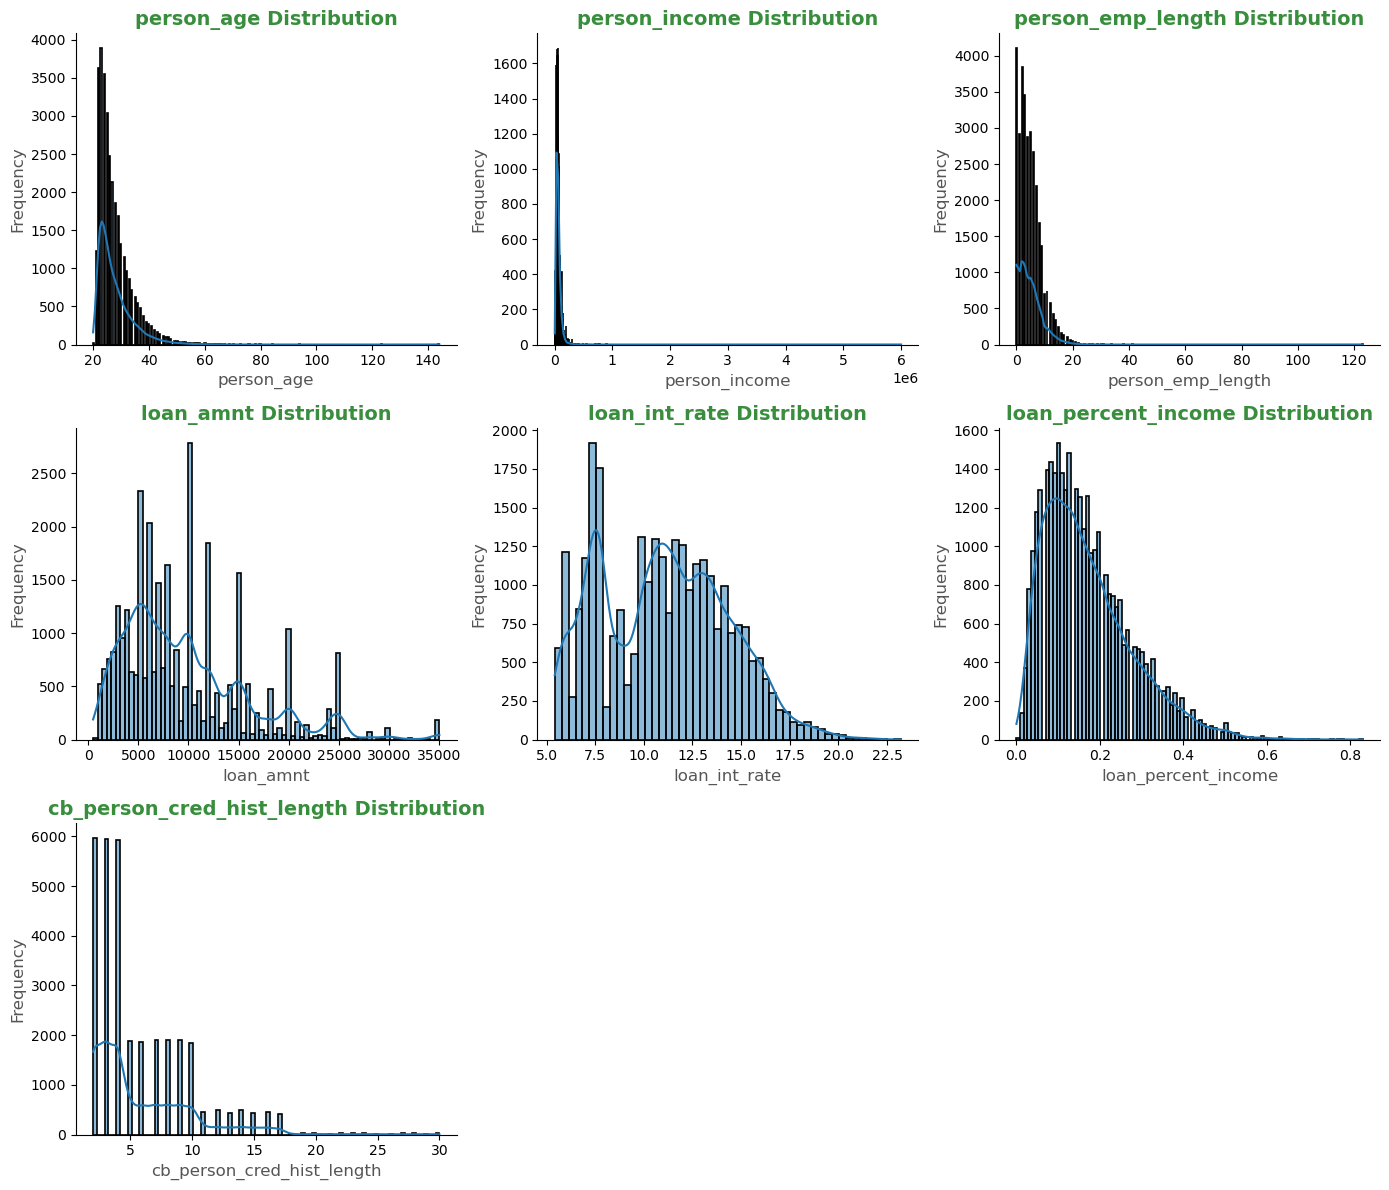

In [60]:
numerical_columns = ['person_age', 'person_income',
                   'person_emp_length', 'loan_amnt','loan_int_rate', 
                     'loan_percent_income', 'cb_person_cred_hist_length']

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(14, 12))

for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//3 + 1, 3, idx)  
    sns.histplot(data[col], kde=True, linewidth=1.2) 
    
    plt.title(f'{col} Distribution', fontsize=14, weight='bold', color="#388e3c")
    plt.xlabel(col, fontsize=12, color="#555555")
    plt.ylabel('Frequency', fontsize=12, color="#555555")
    
    sns.despine()

plt.tight_layout()
plt.savefig('data_distribution_before.jpg', format='jpg', dpi=300)
plt.show()

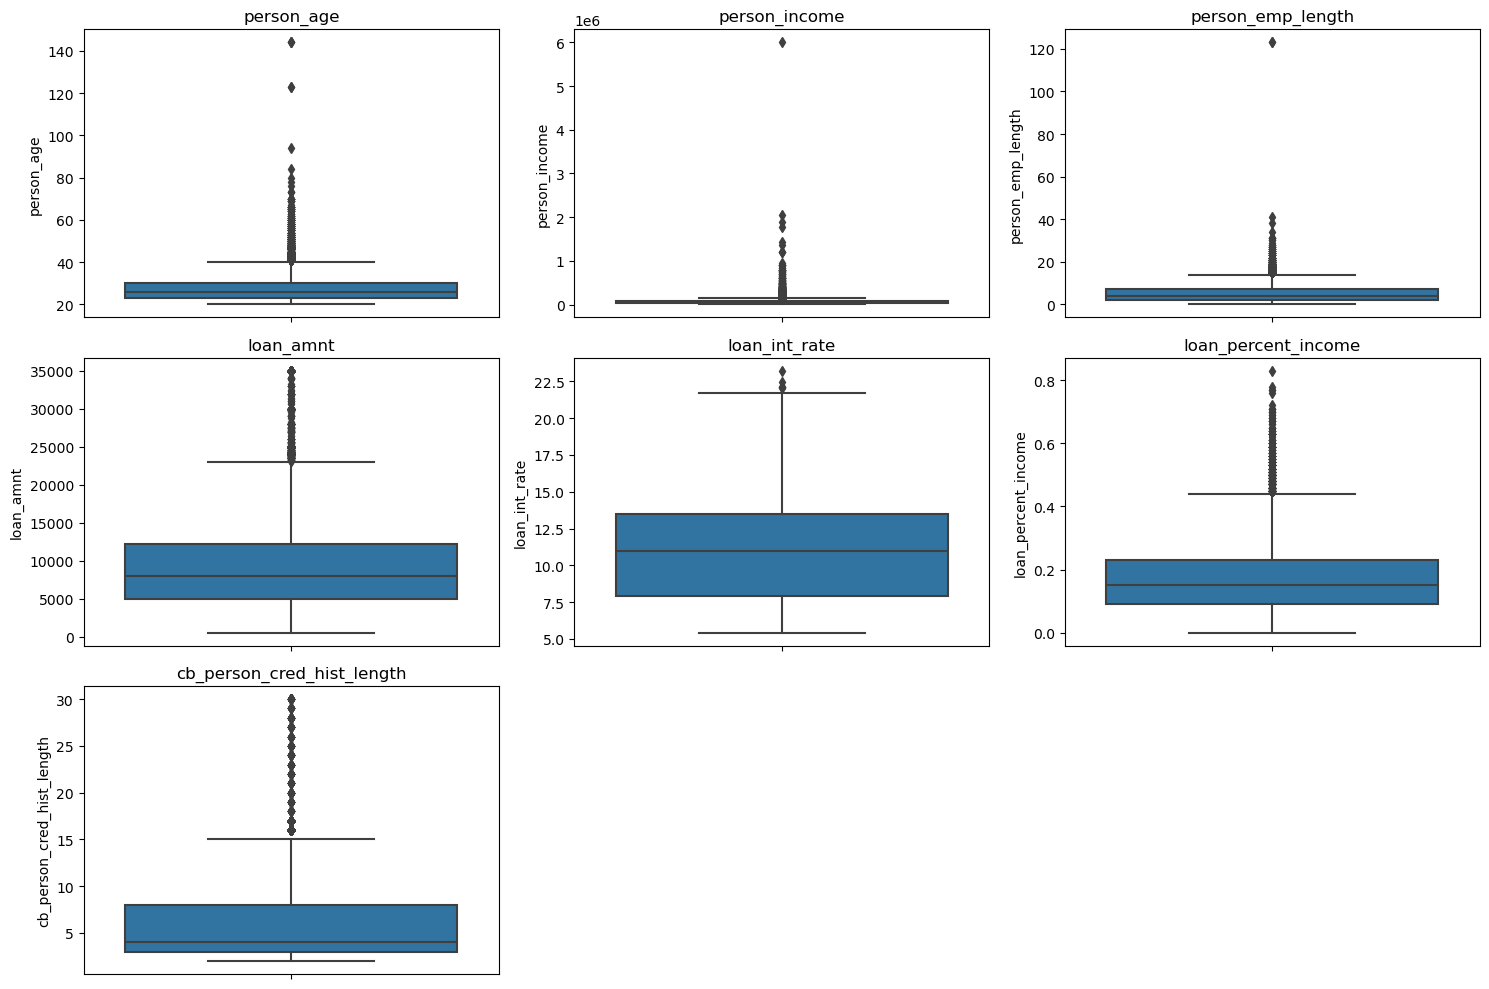

In [16]:
# Create subplots
fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(15, 10))

# Flatten the 2D array of axes
axes = axes.flatten()

# Plot each column as a boxplot
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=data[column], ax=axes[i])
    axes[i].set_title(column)

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)  # Hide any unused subplots

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


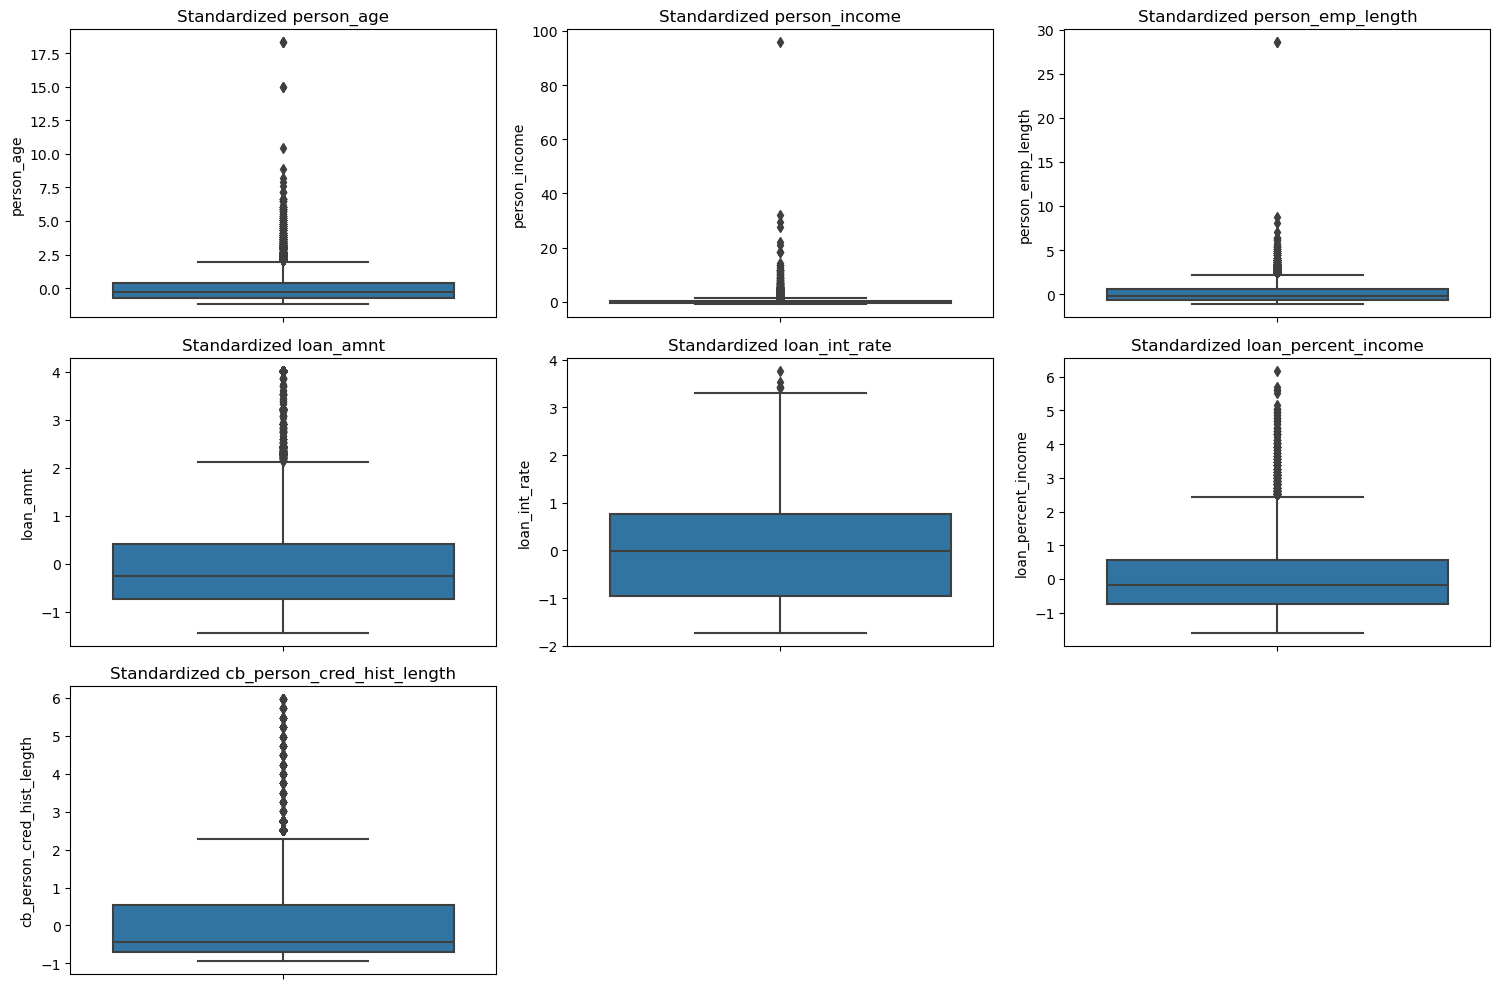

In [17]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data[numerical_columns])

# Convert the standardized data back to a DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=numerical_columns)

# Plot each column as a boxplot
fig, axes = plt.subplots(nrows=(len(numerical_columns) // 3) + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(y=standardized_df[column], ax=axes[i])
    axes[i].set_title(f"Standardized {column}")

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [28]:
#dealing with outlier:
# Calculate the IQR for each column
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound))

# Calculate the total number of outliers for each column
total_outliers_per_column = outliers.sum()

# Calculate the total number of outliers across all columns
total_outliers = total_outliers_per_column.sum()

# Print the results
print("Total number of outliers per column:")
print(total_outliers_per_column)

print("\nTotal number of outliers across all columns:", total_outliers)



Total number of outliers per column:
person_age                    1494
person_income                 1484
person_emp_length              853
loan_amnt                     1689
loan_int_rate                    6
loan_percent_income            651
cb_person_cred_hist_length    1142
dtype: int64

Total number of outliers across all columns: 7319


In [30]:
#Detecting outlier using Z-score
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = data[numerical_columns].apply(zscore)

# Define a Z-score threshold
z_threshold = 3

# Identify outliers: True if absolute Z-score > threshold
outliers = (z_scores.abs() > z_threshold)

# Calculate the total number of outliers for each column
total_outliers_per_column = outliers.sum()

# Calculate the total number of outliers across all columns
total_outliers = total_outliers_per_column.sum()

# Print the results
print("Total number of outliers per column:")
print(total_outliers_per_column)

print("\nTotal number of outliers across all columns:", total_outliers)


Total number of outliers per column:
person_age                    558
person_income                 233
person_emp_length               0
loan_amnt                     337
loan_int_rate                   0
loan_percent_income           336
cb_person_cred_hist_length    284
dtype: int64

Total number of outliers across all columns: 1748


In [35]:
# Dropping rows with outliers
# Create a mask for rows without outliers (all Z-scores within the threshold)
non_outliers_mask = ~outliers.any(axis=1)

# Filter the data to exclude outliers
data_cleaned = data[non_outliers_mask]

# Print the number of rows before and after dropping outliers
print("\nNumber of rows before removing outliers:", len(data))
print("Number of rows after removing outliers:", len(data_no_outliers))
print("Number of rows removed:", len(data) - len(data_no_outliers))


Number of rows before removing outliers: 32581
Number of rows after removing outliers: 31191
Number of rows removed: 1390


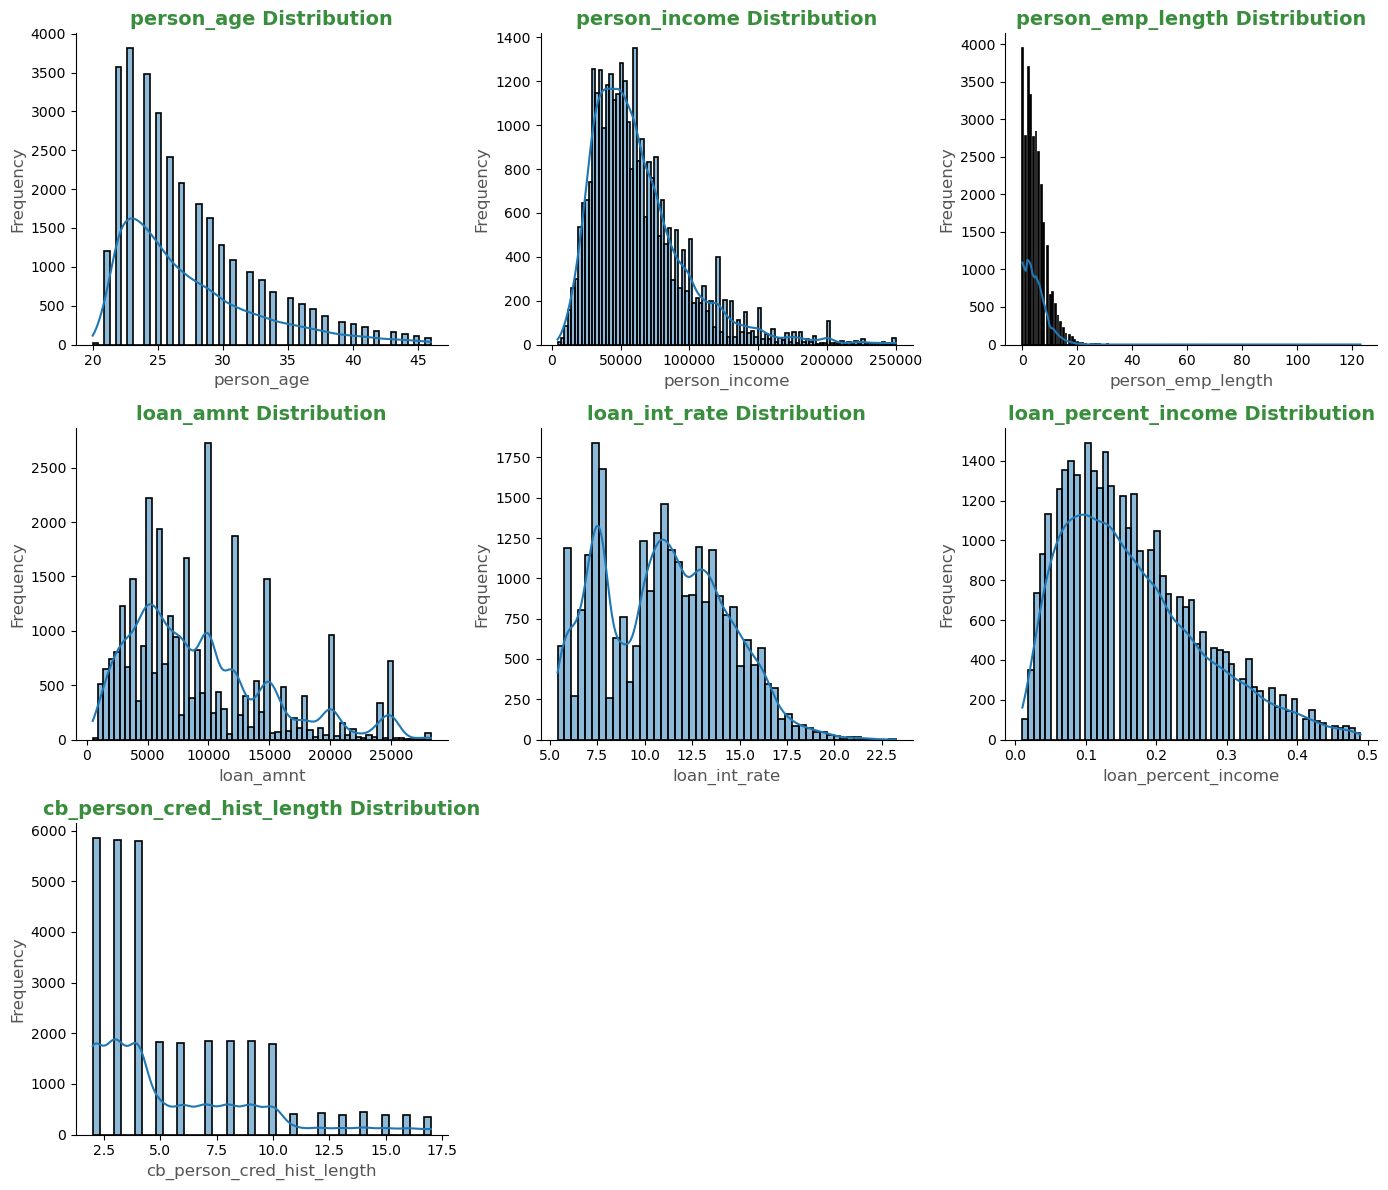

In [58]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(14, 12))

for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//3 + 1, 3, idx)  
    sns.histplot(data_cleaned[col], kde=True, linewidth=1.2) 
    
    plt.title(f'{col} Distribution', fontsize=14, weight='bold', color="#388e3c")
    plt.xlabel(col, fontsize=12, color="#555555")
    plt.ylabel('Frequency', fontsize=12, color="#555555")
    
    sns.despine()

plt.tight_layout()
plt.savefig('data_distribution.jpg', format='jpg', dpi=300)
plt.show()

In [38]:
#Encoding the data
encoder = OneHotEncoder(sparse_output=False, drop=None)
columns_to_encode = ['person_home_ownership', 'loan_intent']
encoded_data = encoder.fit_transform(data_cleaned[columns_to_encode])
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))
df = pd.concat([data, df_encoded], axis=1)
df.drop(columns=columns_to_encode, inplace=True)
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,D,35000,16.02,1,0.59,Y,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,21,9600,5.0,B,1000,11.14,0,0.10,N,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25,9600,1.0,C,5500,12.87,1,0.57,N,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,23,65500,4.0,C,35000,15.23,1,0.53,N,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,24,54400,8.0,C,35000,14.27,1,0.55,Y,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
ordinal_encoder = LabelEncoder()
df['loan_grade_encoded'] = ordinal_encoder.fit_transform(data['loan_grade'])
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y':1, 'N':0})
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_encoded
0,22,59000,123.0,D,35000,16.02,1,0.59,1,3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
1,21,9600,5.0,B,1000,11.14,0,0.10,0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,25,9600,1.0,C,5500,12.87,1,0.57,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,23,65500,4.0,C,35000,15.23,1,0.53,0,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,24,54400,8.0,C,35000,14.27,1,0.55,1,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2


In [40]:
df.drop(columns=['loan_grade'], inplace=True)

In [41]:
X = df.drop('loan_status', axis=1)
Y = df['loan_status']

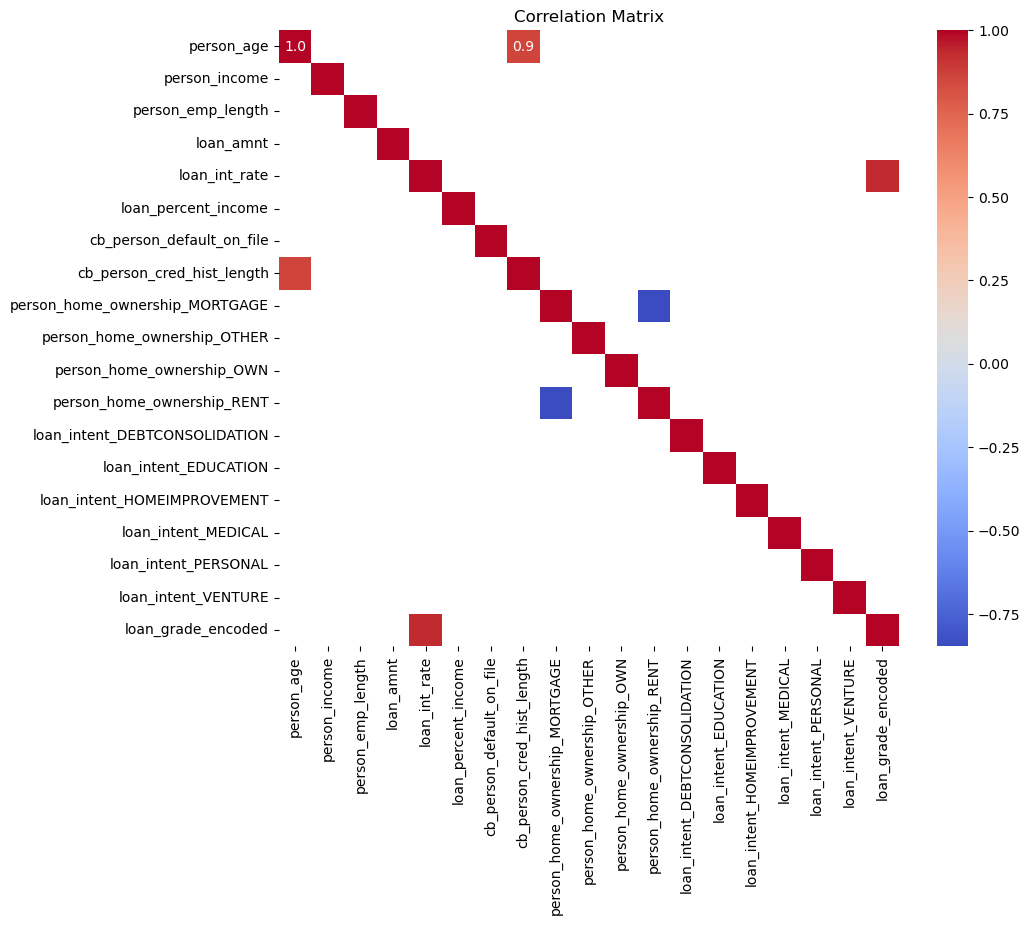

In [43]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(X)
X_standardized = pd.DataFrame(df_standardized, columns=X.columns)
corr_matrix = X_standardized.corr()

plt.figure(figsize=(10,8))
mask = np.abs(corr_matrix) < 0.75
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [46]:
from sklearn.decomposition import PCA 
from sklearn.impute import KNNImputer
#fill missing value with KNN
imputer = KNNImputer(n_neighbors=5, weights='uniform')
X_standardized[X_standardized.columns] = imputer.fit_transform(X_standardized[X_standardized.columns])

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_standardized)


# Split into train, test and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42, stratify=Y) # Pass X_pca if needed

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (26064, 14)
X_test shape: (6517, 14)



Logistic Regression Model:
Accuracy: 0.833052017799601
Confusion Matrix:
[[4844  251]
 [ 837  585]]
ROC AUC: 0.6810642103824797
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5095
           1       0.70      0.41      0.52      1422

    accuracy                           0.83      6517
   macro avg       0.78      0.68      0.71      6517
weighted avg       0.82      0.83      0.82      6517



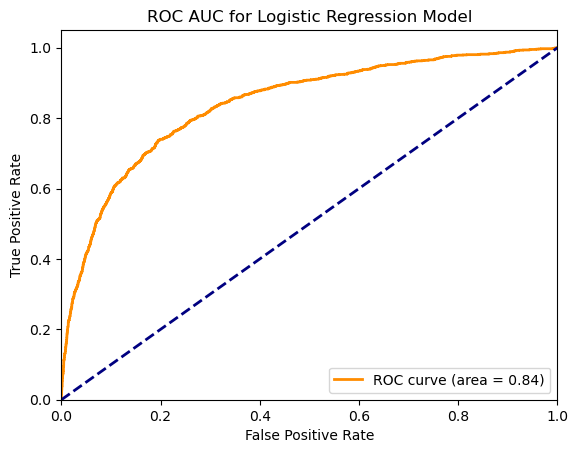

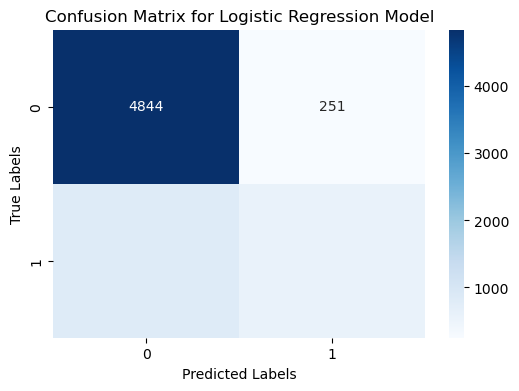


Decision Tree Model:
Accuracy: 0.7744360902255639
Confusion Matrix:
[[4346  749]
 [ 721  701]]
ROC AUC: 0.6729803908578085
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5095
           1       0.48      0.49      0.49      1422

    accuracy                           0.77      6517
   macro avg       0.67      0.67      0.67      6517
weighted avg       0.78      0.77      0.78      6517



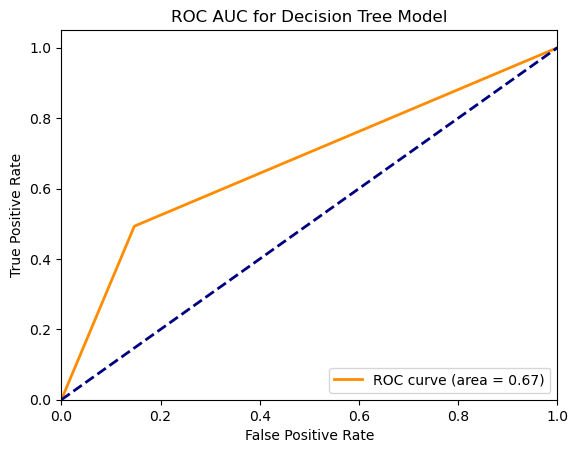

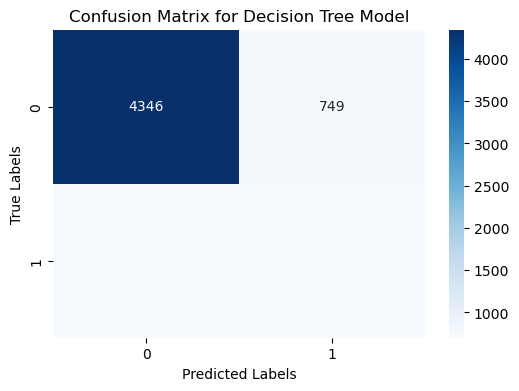


Support Vector Machine (SVM) Model:
Accuracy: 0.8471689427650759
Confusion Matrix:
[[4882  213]
 [ 783  639]]
ROC AUC: 0.7037806983764177
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5095
           1       0.75      0.45      0.56      1422

    accuracy                           0.85      6517
   macro avg       0.81      0.70      0.73      6517
weighted avg       0.84      0.85      0.83      6517



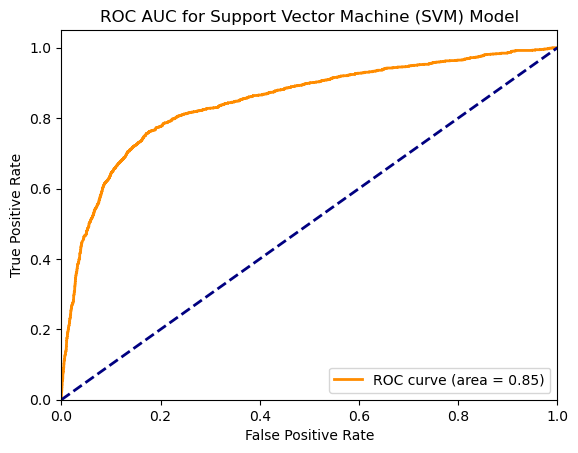

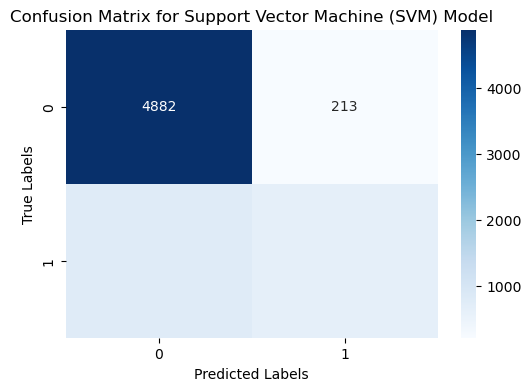


Random Forest Model:
Accuracy: 0.8474758324382384
Confusion Matrix:
[[4777  318]
 [ 676  746]]
ROC AUC: 0.7310995446571402
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5095
           1       0.70      0.52      0.60      1422

    accuracy                           0.85      6517
   macro avg       0.79      0.73      0.75      6517
weighted avg       0.84      0.85      0.84      6517



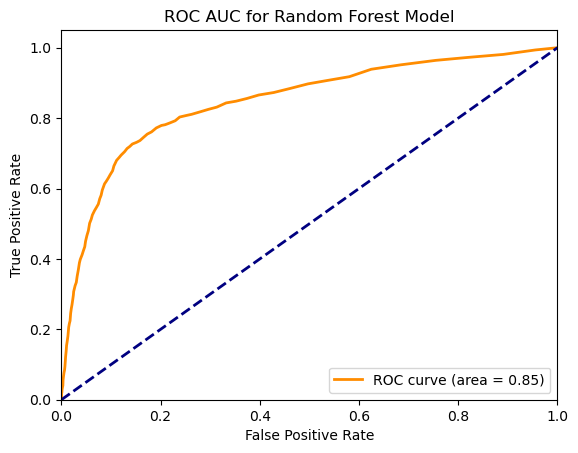

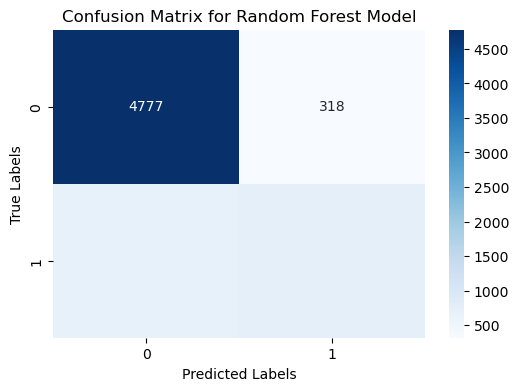


AdaBoost Model:
Accuracy: 0.8378088077336198
Confusion Matrix:
[[4791  304]
 [ 753  669]]
ROC AUC: 0.7053988977362601
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5095
           1       0.69      0.47      0.56      1422

    accuracy                           0.84      6517
   macro avg       0.78      0.71      0.73      6517
weighted avg       0.83      0.84      0.83      6517



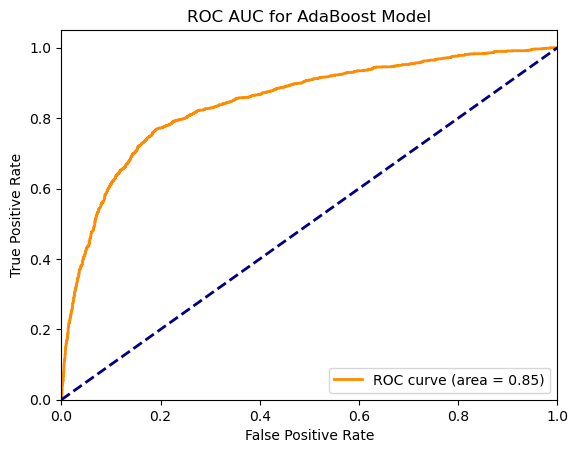

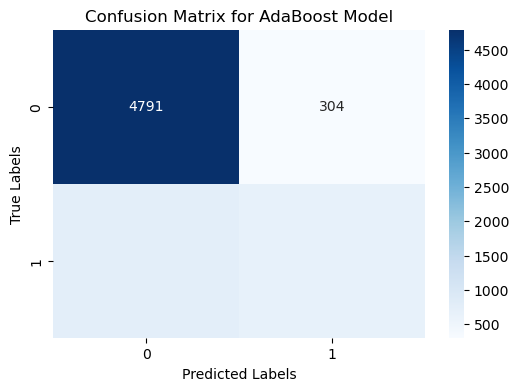


Bagging Classifier Model:
Accuracy: 0.831824459106951
Confusion Matrix:
[[4761  334]
 [ 762  660]]
ROC AUC: 0.6992902779675615
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      5095
           1       0.66      0.46      0.55      1422

    accuracy                           0.83      6517
   macro avg       0.76      0.70      0.72      6517
weighted avg       0.82      0.83      0.82      6517



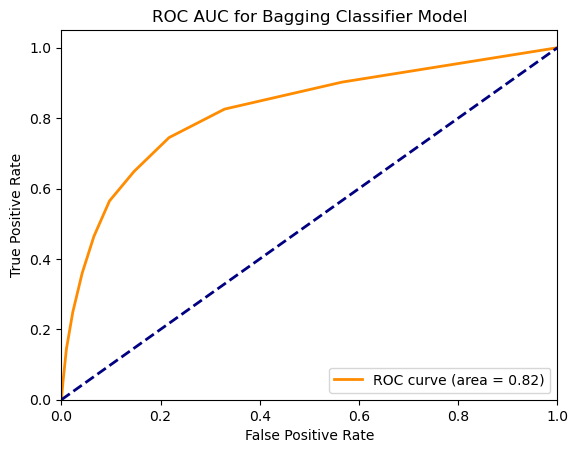

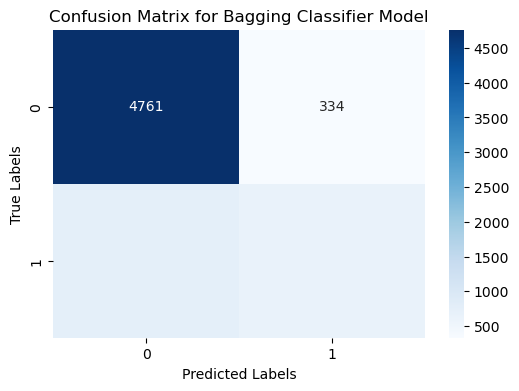


XGBoost Model:
Accuracy: 0.8450207150529385
Confusion Matrix:
[[4751  344]
 [ 666  756]]
ROC AUC: 0.7320641979602738
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5095
           1       0.69      0.53      0.60      1422

    accuracy                           0.85      6517
   macro avg       0.78      0.73      0.75      6517
weighted avg       0.84      0.85      0.84      6517



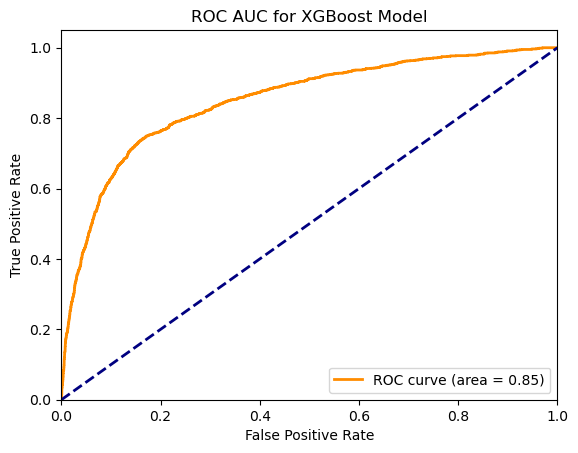

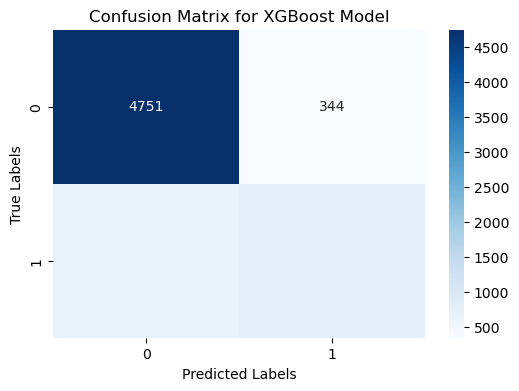


MLP Classifier Model:
Accuracy: 0.8540739604112322
Confusion Matrix:
[[4803  292]
 [ 659  763]]
ROC AUC: 0.7396285622400827
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5095
           1       0.72      0.54      0.62      1422

    accuracy                           0.85      6517
   macro avg       0.80      0.74      0.76      6517
weighted avg       0.85      0.85      0.85      6517



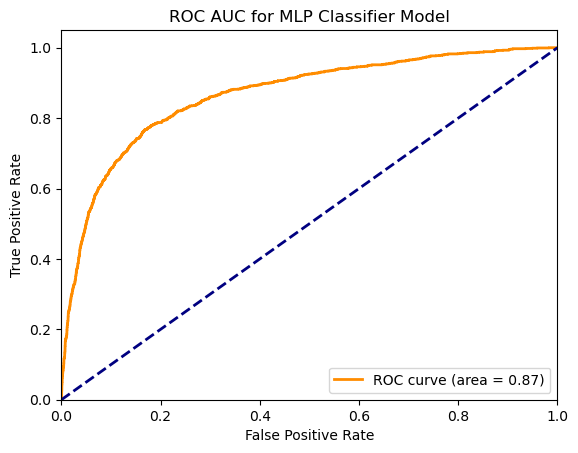

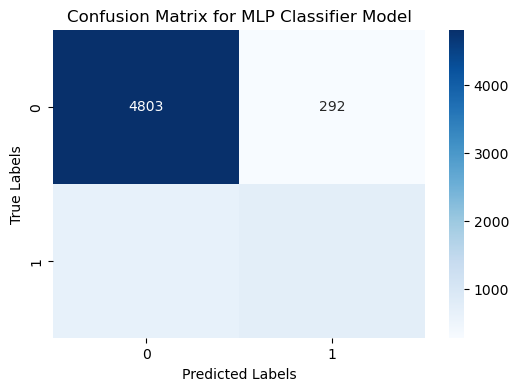


Naive Bayes Model:
Accuracy: 0.8115697406782262
Confusion Matrix:
[[4621  474]
 [ 754  668]]
ROC AUC: 0.6883642577248867
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      5095
           1       0.58      0.47      0.52      1422

    accuracy                           0.81      6517
   macro avg       0.72      0.69      0.70      6517
weighted avg       0.80      0.81      0.80      6517



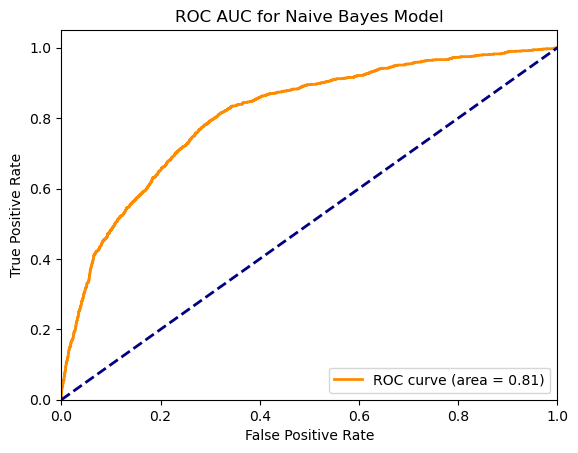

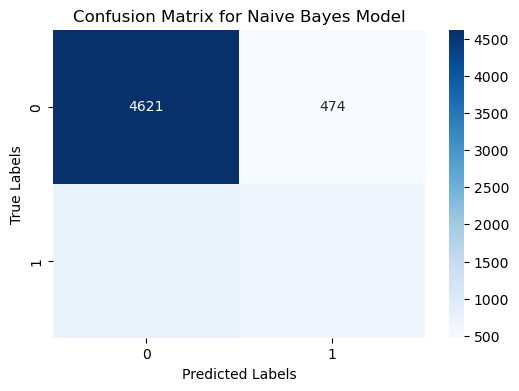

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Function to train and evaluate a model

def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)


  print(f"\n{model_name} Model:")
  print(f"Accuracy: {accuracy}")
  print(f"Confusion Matrix:\n{conf_matrix}")
  print(f"ROC AUC: {roc_auc}")
  print(f"Classification Report:\n{class_report}")

  # Visualize ROC AUC

  y_pred_proba = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC AUC for {model_name} Model')
  plt.legend(loc="lower right")
  plt.show()

  # Visualize confusion matrix

  plt.figure(figsize=(6, 4))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix for {model_name} Model')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

  return accuracy, roc_auc

# Train and evaluate different models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (SVM)": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "XGBoost": XGBClassifier(enable_categorical=True),
    "MLP Classifier": MLPClassifier(max_iter=500),
    "Naive Bayes": GaussianNB()
}

results = {}

for model_name, model in models.items():

  accuracy, roc_auc = train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name)
  results[model_name] = {"accuracy": accuracy, "roc_auc": roc_auc}

In [83]:


# Define models with their respective parameter grids for GridSearchCV
model_dict = {
    "RandomForestClassifier": (RandomForestClassifier(), {'classifier__n_estimators': [100, 200, 500], 'classifier__max_depth': [None, 20, 30]}),
    "XGBClassifier": (XGBClassifier(), {'classifier__learning_rate': [0.1, 0.01, 1], 'classifier__max_depth': [2, 4, 6]}),
    "KNeighborsClassifier": (KNeighborsClassifier(), {'classifier__n_neighbors': [5, 10, 15], 'classifier__weights': ['uniform', 'distance']}),
    "GaussianNB": (GaussianNB(), {}),
    "AdaBoostClassifier": (AdaBoostClassifier(), {'classifier__n_estimators': [100, 200, 500], 'classifier__learning_rate': [0.01, 0.1, 1.0]}),
    "GradientBoostingClassifier": (GradientBoostingClassifier(), {'classifier__n_estimators': [100, 200, 500], 'classifier__learning_rate': [0.01, 0.1, 1.0], 'classifier__max_depth': [3, 5]}),
}
for model_name, (model, param_grid) in model_dict.items():
    print(f"Running GridSearchCV for {model_name} ...")

    # Create a pipeline 
    pipeline = Pipeline([
        ('classifier', model)
    ])

    #finetuning parameter for model using grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.2f}")

    # Evaluate on validation set with best model
    best_model = grid_search.best_estimator_
    # Predict on validation set
    y_pred = best_model.predict(X_test)
    # Evaluate the model
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{model_name} Classification report\n", classification_report(y_test, y_pred))
    print("---------------------------")

Running GridSearchCV for RandomForestClassifier ...
Best parameters for RandomForestClassifier: {'classifier__max_depth': None, 'classifier__n_estimators': 500}
Best cross-validation accuracy for RandomForestClassifier: 0.91
RandomForestClassifier Accuracy: 0.9079330980512506
RandomForestClassifier Classification report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      5095
           1       0.90      0.65      0.76      1422

    accuracy                           0.91      6517
   macro avg       0.90      0.82      0.85      6517
weighted avg       0.91      0.91      0.90      6517

---------------------------
Running GridSearchCV for XGBClassifier ...
Best parameters for XGBClassifier: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6}
Best cross-validation accuracy for XGBClassifier: 0.91
XGBClassifier Accuracy: 0.907626208378088
XGBClassifier Classification report
               precision    recall  f1-score   s